In [3]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  7 17:26:47 2023

@author: 459
"""


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
import os

path = os.path.abspath("C:\\machine_learning\\machin_leanring\\new_project\\housing.csv")

#path = ".\\housing.csv"
#df data frame
df = pd.read_csv(path,encoding='cp1252')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
## general info of the table
# one colmun is string
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
##show max min mean std
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
##no of null values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Exploratory  Data Analysis EDA
total_bedrooms has 207 null values
#univirates visualization on variable or feature

In [35]:
#ocean_proximity data count [ocean_proximity data gruop]
ocean_proximity_counts = df["ocean_proximity"].value_counts(ascending=False)
#count of every group
ocean_proximity_counts
#values of this group
ocean_proximity_counts.index



Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

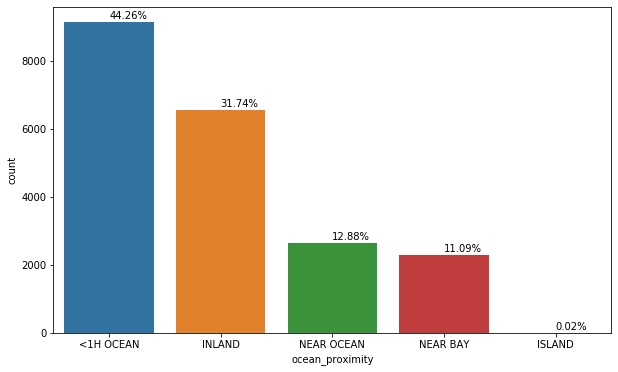

In [47]:
#show ocean_proximity_counts in plot
plt.figure(figsize=(10,6))
sns.countplot(df["ocean_proximity"], order=ocean_proximity_counts.index)
#showing % percentage 
for i in range(ocean_proximity_counts.shape[0]):
    count = ocean_proximity_counts[i]
    str = '{:0.2f}%'.format( 100* count / df.shape[0])
    plt.text(i, count + 100, str )

        

In [ ]:
#data histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026668F5A0C8>,
      dtype=object)

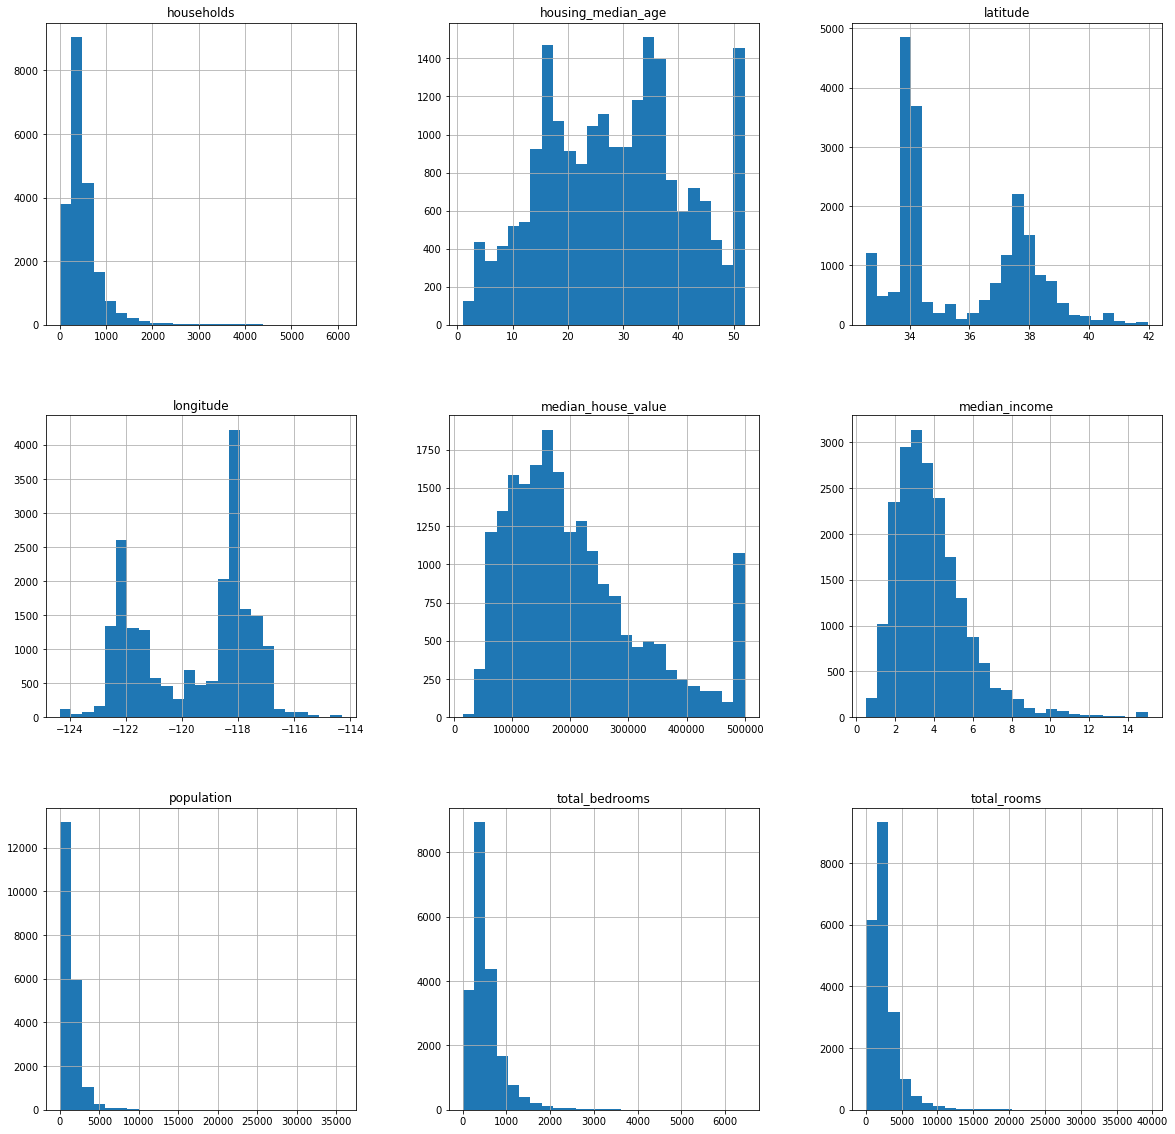

In [49]:
df.hist(figsize=(20,20), bins=25)

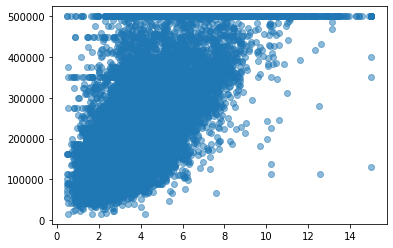

In [50]:
# I feel there is a relatin between the income and house price (correlation)
# I will do plot scatter digram to show the correlation
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.5)

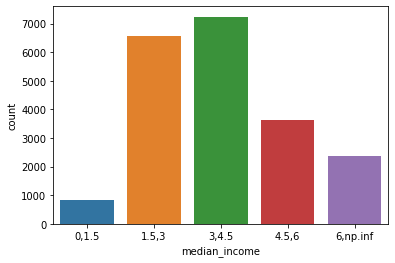

In [70]:
## try to convert median_income to nominal [chunks] or segmants
df["median_income"]
median_income_bins = pd.cut(x= df["median_income"],bins=[0,1.5,3,4.5,6,np.inf],
                            labels=['0,1.5','1.5,3','3,4.5','4.5,6','6,np.inf', ])
sns.countplot(median_income_bins)

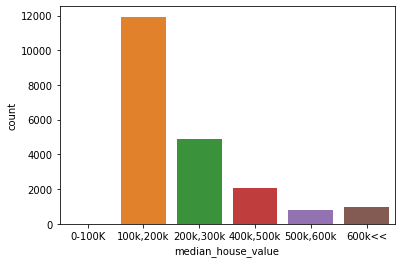

In [77]:
## try to convert median_house_value to nominal [chunks] or segmants

median_house_value_bins = pd.cut(x= df["median_house_value"], bins=[0,10000,200000,300000,400000,500000,np.inf],
                            labels=['0-100K','100k,200k','200k,300k','400k,500k','500k,600k','600k<<'])
sns.countplot(median_house_value_bins)


### Bivariate Visualization
#relation between 2 varibles 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


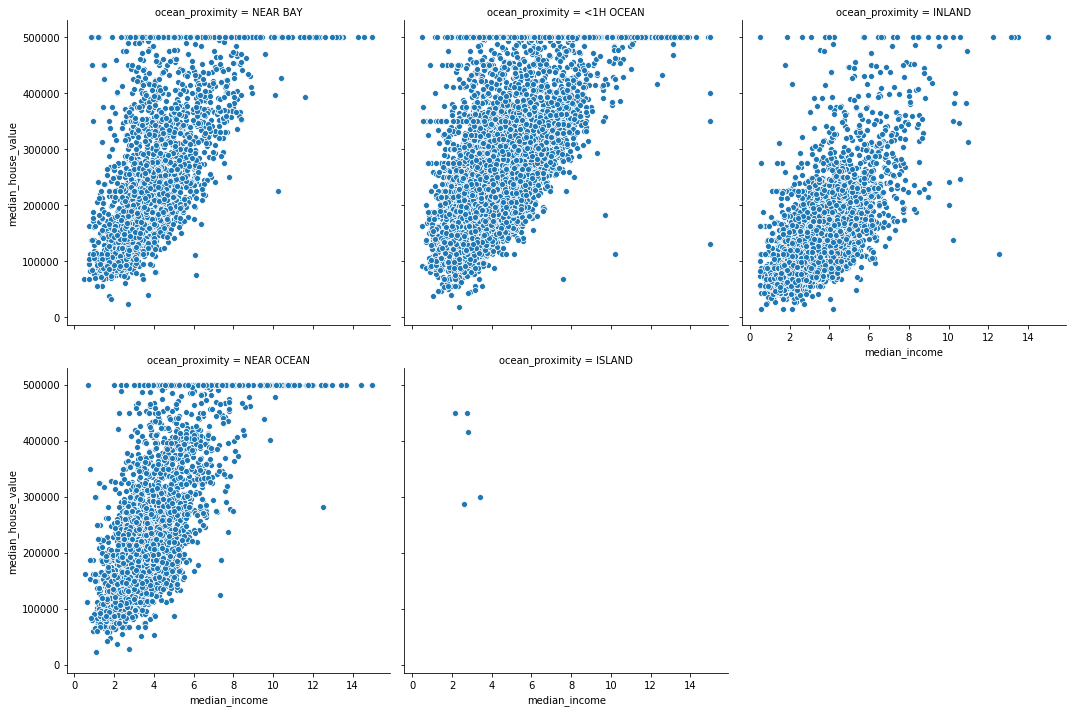

In [84]:
df.info()
## scatter median_income and median_house_value   based on ocean_proximity  groups, show 3 objects per row    
sns.relplot(x="median_income", y="median_house_value",data=df ,col="ocean_proximity", col_wrap=3)